In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

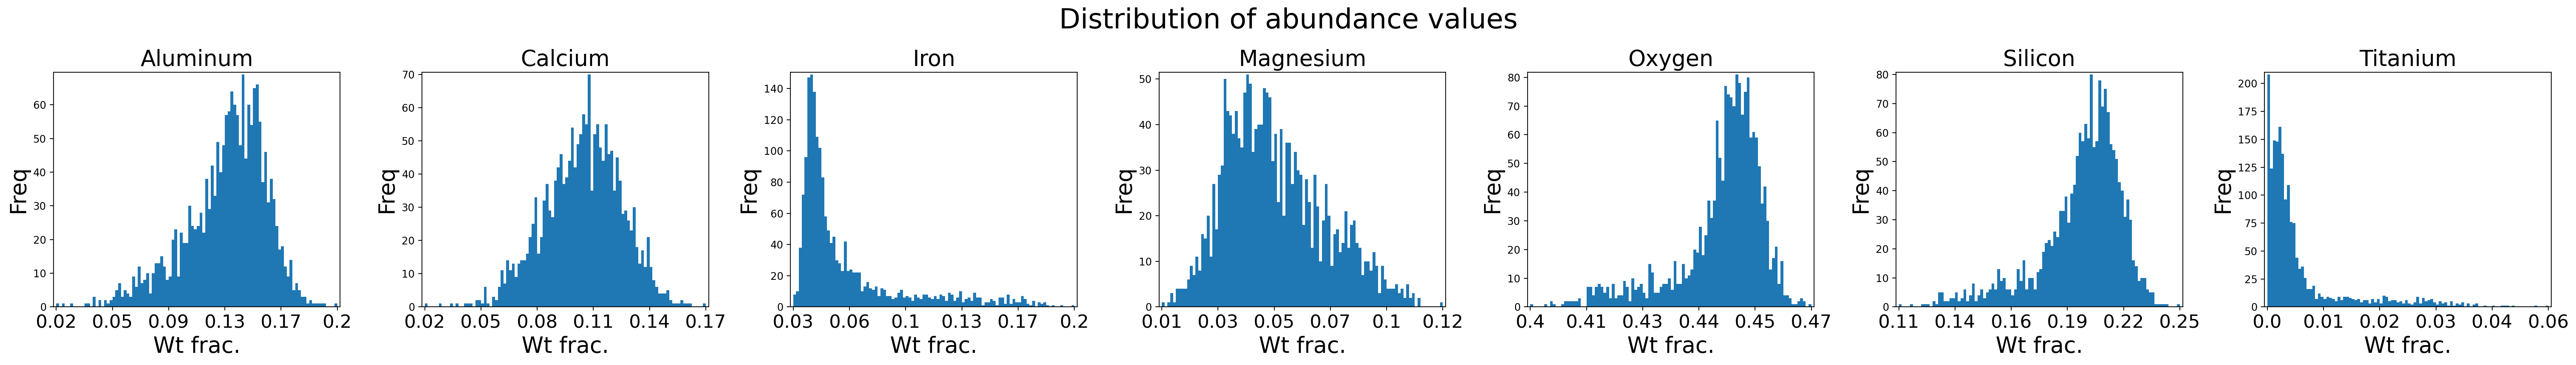

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

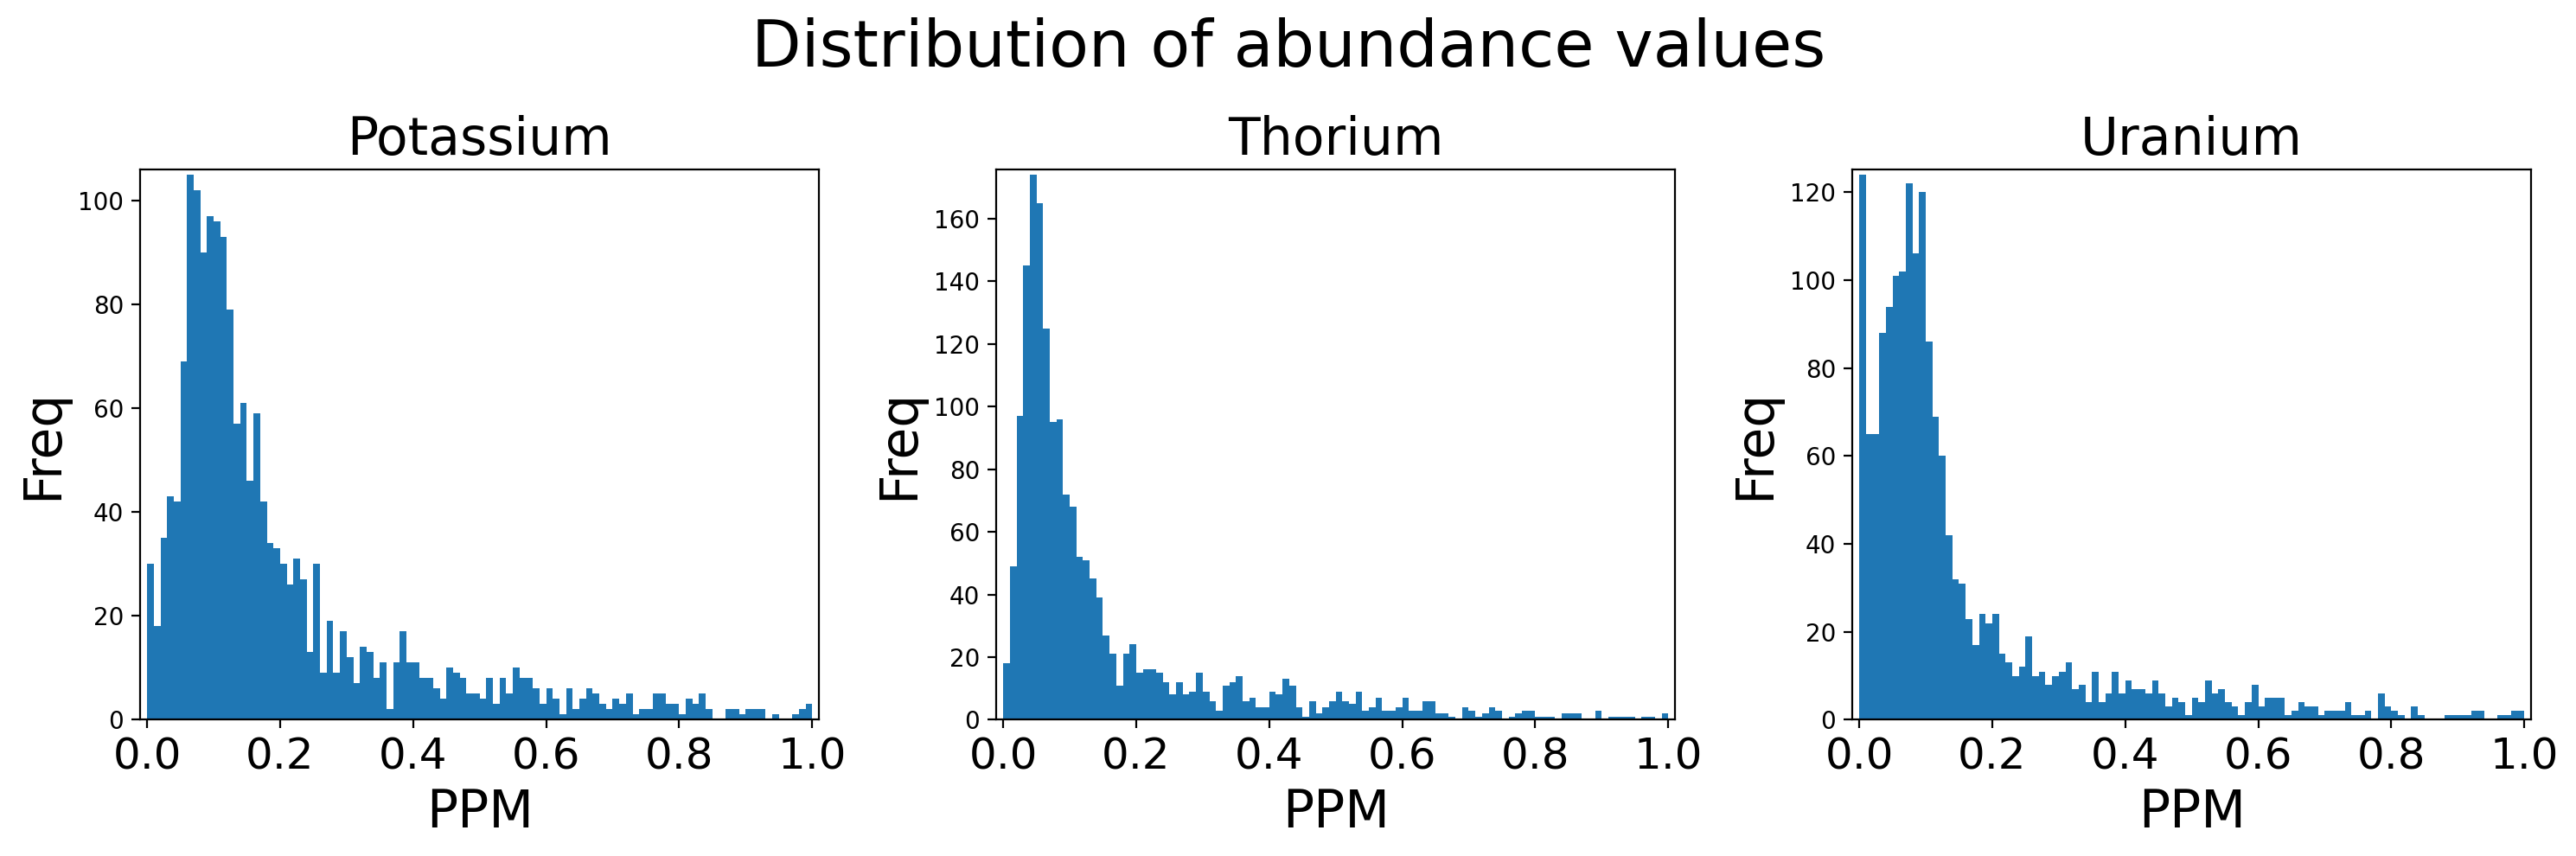

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

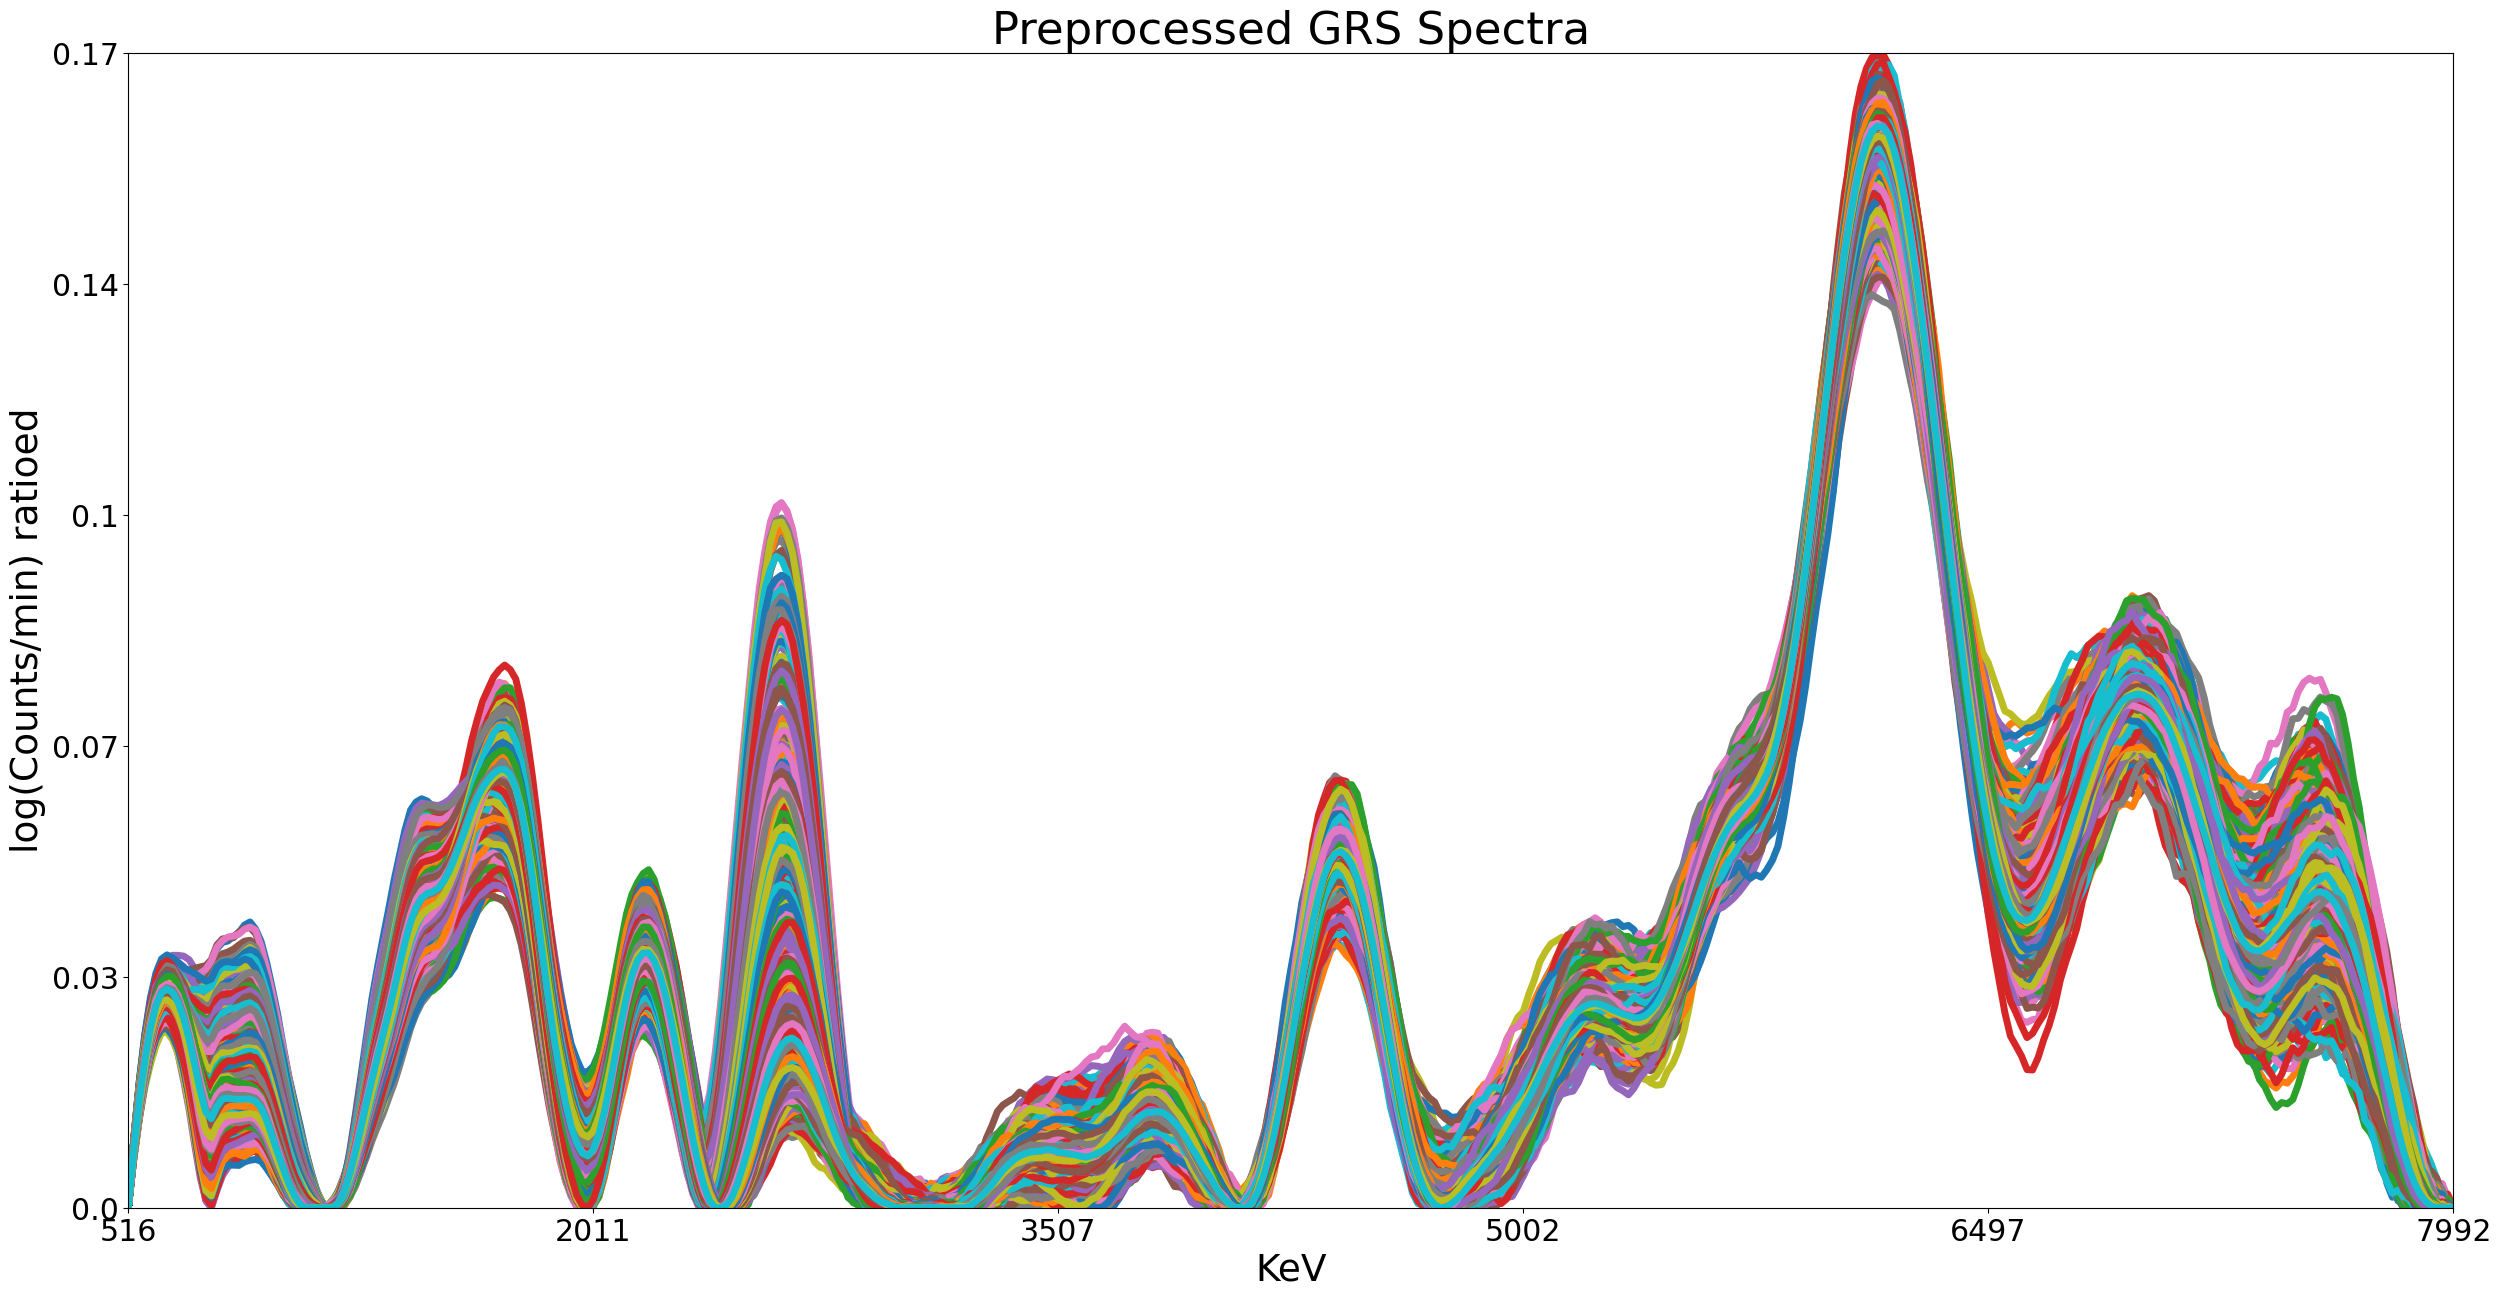

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import tensorflow
import tensorflow as tf

In [25]:
#set a global seed value
globalSeed=23

In [26]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [27]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [28]:
# define a funtion which creates the CAM (Channel Attention Module)
def createCAM(inputFeatureBlock,reductionRatio):
    #perform max pooling along the channel dimension
    channelMaxPooledFeatures=tf.math.reduce_max(inputFeatureBlock,
                                                axis=1,
                                                keepdims=False)
    
    #perform avg pooling along the channel dimension
    channelAvgPooledFeatures=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=1,
                                                 keepdims=False)
    
    #create the bottleneck for the MLP
    bottleneckLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1]//reductionRatio,
                                          activation='relu')
    
    #create the recontruction layer for the MLP
    outputLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1],
                                      activation='relu')
    
    
    #pass the max pooled features through the bottle-neck
    reconstructeedMaxPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #pass the avg pooled features through the bottle-neck
    reconstructeedAvgPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #add the two reconstructed features together
    summedFeatures=tf.math.add(reconstructeedMaxPooledFeatures,
                               reconstructeedAvgPooledFeatures)
    
    #apply sigmoid activation to the summed features to get the channel attention map
    channelAttentionMap=tf.keras.activations.sigmoid(summedFeatures)
    
    #return the channel attention map
    return channelAttentionMap

In [29]:
#define a function to create the Spatial attention module (SAM)
def createSAM(inputFeatureBlock,kernelSize):
    #perform max pooling on the input features
    maxPooledFeatureMap=tf.math.reduce_max(inputFeatureBlock,
                                           axis=-1,
                                           keepdims=False)
    #perform average pooling on the input features
    averagePooledFeatureMap=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=-1,
                                                 keepdims=False)
    
    #concatenate the feature maps together
    concatenatedFeatureMaps=tf.concat([tf.expand_dims(maxPooledFeatureMap,
                                                      axis=-1),
                                       tf.expand_dims(averagePooledFeatureMap,
                                                      axis=-1)],
                                      axis=-1)
    
    #create the convolutional layer to be applied to the concatenated feature map
    convolutionLayer=tf.keras.layers.Conv1D(filters=1,
                                            kernel_size=kernelSize,
                                            strides=1,
                                            padding='same',
                                            activation='sigmoid')
    
    
    #get the spatial attention map
    spatialAttentionMap=convolutionLayer(concatenatedFeatureMaps)
    
    
    #return the channel attention map
    return spatialAttentionMap

In [30]:
#define a function which creates a CBAM block
def createCBAM(inputLayer,convolutionalKernelSize,noOfConvolutionalFilters,reductionRatio,spatialKernelSize):
    #create a convolutional layer
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfConvolutionalFilters,
                                              kernel_size=convolutionalKernelSize,
                                              strides=1,
                                              padding='same')
    #get the feature block from the convolutional layer
    convolutionalFeatures=convolutionalLayer(inputLayer)
    
    #get the channel attention map
    channelAttentionMap=createCAM(convolutionalFeatures,
                                  reductionRatio)
    
    #replicate the channel attention to make it multiplicative with the features
    replicatedChannelAttentionMaps=tf.expand_dims(channelAttentionMap,
                                                  axis=1)
    replicatedChannelAttentionMaps=tf.repeat(replicatedChannelAttentionMaps,
                                             convolutionalFeatures.shape[1],
                                             axis=1)
    
    #compute the channel refined feature by performing element-wise multiplication between the features and the channel attention maps
    channelRefinedFeatures=tf.math.multiply(replicatedChannelAttentionMaps,
                                            convolutionalFeatures)
    
    #get the spatial attention map
    spatialAttentionMap=createSAM(channelRefinedFeatures,
                                  spatialKernelSize)
    
    #replicate the attention map to make it multiplicative with the channel-refined features
    replicatedSpatialAttentionMaps=tf.repeat(spatialAttentionMap,
                                             channelRefinedFeatures.shape[-1],
                                             axis=-1)
    
    #multiply the attention map with the channel refined features
    spatiallyRefinedFeatures=tf.math.multiply(replicatedSpatialAttentionMaps,
                                              channelRefinedFeatures)
    
    
    #add the refined features to the original features
    refinedFeatures=tf.math.add(convolutionalFeatures,
                                spatiallyRefinedFeatures)
    
    #return the refined features (i.e. the output of the CBAM)
    return refinedFeatures

In [31]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate,noOfCBAMBLocks):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    #add the specified number of CBAM blocks
    for i in range(noOfCBAMBLocks):
        #add the CBAM module
        volume=createCBAM(volume,
                          convolutionalKernelSize=kernelSize,
                          noOfConvolutionalFilters=noOfFilters,
                          reductionRatio=2,
                          spatialKernelSize=3)
        
        
        #apply batch norm over the refined features
        batchNormalization=tf.keras.layers.BatchNormalization()
        #add the 1st batch-norm layer to the graph
        volume=batchNormalization(volume)
        
        #apply dropout
        dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                             noise_shape=None,
                                             seed=globalSeed)
        #add the 1st dropout layer to the graph
        volume=dropoutLayer(volume)
    
    return volume

In [32]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[4,4,4,4]

In [33]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [34]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [35]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [36]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [37]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [38]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [39]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [40]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [41]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [42]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [43]:
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [44]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [45]:
#define regularization for the element-wise spectra
#the regularizer encourages the elemental spectra to be different
#this is done by computing the pairwise cosine distances, summing them up and maximizing this sum

#as these weights are from seperate (parallel)layers this regularization could not be implemented as inheriting the kernel regularization class
#therefore it is implemented as a loss. As such it recieves the true and predicted values but ignores them
class spectralDisimilarityRegularization(tf.keras.losses.Loss):
    def call(self,linearLayerWeights,_):
        #normalize the weights
        linearLayerWeights=tf.math.l2_normalize(linearLayerWeights,
                                                axis=-2,
                                                epsilon=1e-1)

        #multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
        #sum the dot products up to get a value proportional to the sum of pairwise dot products
        unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                                       linearLayerWeights,
                                                                       transpose_b=True))
        #compute sum of cosine similarities by subtracting the number of sames from the data and then dividing by half
        unmixingSpectralSimilarity=(unmixingSpectralSimilarity-linearLayerWeights.shape[-1])/2

        #return the similarity estimate which is the regularization value
        return unmixingSpectralSimilarity
    

In [46]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class UnitNormNonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        #apply positivity constraint
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
        
        return w



#create the composite constraint by combining the two constraints
unitNormNonNegetivityConstraint=UnitNormNonNegetivityConstraint()

In [47]:
#create an input layer which consists of the number one, it will be used to get the learnt spectra
unitNodeLayer=tf.keras.Input(shape=(1))

In [48]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
abundanceScaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#iterate through each element
for i in range(fullAbundanceEmbedding.shape[-1]):
    #create a contraintedhidden layer to learn the current element's spectra
    temp=tf.keras.layers.Dense(noOfChannels,
                               activation=None,
                               use_bias=False,
                               kernel_constraint=unitNormNonNegetivityConstraint,
                               name=allElementNames[i]+"_Spectra")
    
    
    #save the layer to a list
    elementWiseHiddenLayers.append(temp)
    
    
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp1=temp(tf.expand_dims(fullAbundanceEmbedding[:,i],
                             -1))
    #save the learnt spectra scaled by the abundance
    abundanceScaledElementalSpectra.append(temp1)
    
    
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp2=temp(unitNodeLayer)
    #save the learnt spectra
    unscaledElementalSpectra.append(temp2)
    
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {abundanceScaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [52]:
#stack the abundance scaled elemental spectra together
abundanceScaledElementalSpectraStack=tf.stack(abundanceScaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra scaled by abundance {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra scaled by abundance (None, 421, 10)


In [53]:
#stack the abundance scaled elemental spectra together
unscaledElementalSpectraStack=tf.stack(unscaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra (None, 421, 10)


In [54]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(abundanceScaledElementalSpectraStack,
                                        axis=-1,
                                        keepdims=True)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421, 1)


In [55]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[64,64,64,64]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[3,3,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[1,1,1,1]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [56]:
nuclearElementFeatures=linearMixedSpectra
#add Convolutional blocks to create the feature extractor for the non-linear part of the decoder
for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    recontructionFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                   noOfChannelsInEachConvBlock[i],
                                                   filterSizesForEachConvBlock[i],
                                                   strideSizesForEachConvBlock[i],
                                                   dropoutForEachConvBlock[i],
                                                   attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the {i}th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 421, 1)
Shape of the tensor outputted by the 1th Conv. Block (None, 421, 1)
Shape of the tensor outputted by the 2th Conv. Block (None, 421, 1)
Shape of the tensor outputted by the 3th Conv. Block (None, 421, 1)


In [57]:
#Flatten the features for the non-linearly reconstructed spectra
recontructionFeatures=tf.keras.layers.Flatten()(recontructionFeatures)
print(f"Shape of flattened features {recontructionFeatures.shape}")

Shape of flattened features (None, 53632)


In [58]:
#get the reconstructed spectra
reconstructedSpectra=tf.keras.layers.Dense(preprocessedSpectra.shape[1],activation='relu')(recontructionFeatures)

#print shape of abundances
print(f"Unscaled regular element shape {reconstructedSpectra.shape}")

Unscaled regular element shape (None, 421)


In [59]:
#build the model
unmixingModel=tf.keras.Model(inputs=[inputLayer,
                                     unitNodeLayer],
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      reconstructedSpectra,
                                      unscaledElementalSpectraStack],
                             name="Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model")

In [60]:
#create loss functions for the embeddings, Mean Squared Error
regularAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
nuclearAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
#set the number of epochs the model is to be trained for
noOfEpochs=2000
#set the batch size
batchSize=16

#create the regularizer
spectralDisimilarityRegularizer=spectralDisimilarityRegularization()

#steps the number of steps to be processed in one execution
stepsPerExecution=

In [61]:
#create a loss dictionary
lossDictionary=[regularAbundanceLossFunction,
                nuclearAbundanceLossFunction,
                recontructedSpectraLoss,
                spectralDisimilarityRegularizer]

In [62]:
#creat a list with loss weights
lossWeights=[25e-2,
             1,
             1e-3,
             1e-2]

In [63]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

In [64]:
#summarize the model
unmixingModel.summary()

Model: "Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 421, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 139, 128)     1024        ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 139, 128)     17792       ['conv1d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 139, 128)    512         ['p_re_lu[0][0]']                
 alization)                      

                                                                                                  
 tf.repeat_2 (TFOpLambda)       (None, 139, 128)     0           ['tf.expand_dims_3[0][0]']       
                                                                                                  
 tf.math.multiply_2 (TFOpLambda  (None, 139, 128)    0           ['tf.repeat_2[0][0]',            
 )                                                                'conv1d_3[0][0]']               
                                                                                                  
 tf.math.reduce_max_3 (TFOpLamb  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_3 (TFOpLam  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 bda)     

 dropout_3 (Dropout)            (None, 139, 128)     0           ['batch_normalization_3[0][0]']  
                                                                                                  
 conv1d_7 (Conv1D)              (None, 139, 128)     114816      ['dropout_3[0][0]']              
                                                                                                  
 tf.math.reduce_max_6 (TFOpLamb  (None, 128)         0           ['conv1d_7[0][0]']               
 da)                                                                                              
                                                                                                  
 dense_6 (Dense)                (None, 64)           8256        ['tf.math.reduce_max_6[0][0]',   
                                                                  'tf.math.reduce_max_6[0][0]']   
                                                                                                  
 dense_7 (

 )                                                                'conv1d_10[0][0]']              
                                                                                                  
 tf.math.reduce_max_9 (TFOpLamb  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_9 (TFOpLam  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 bda)                                                                                             
                                                                                                  
 tf.expand_dims_13 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_9[0][0]']   
                                                                                                  
 tf.expand

 tf.math.reduce_max_12 (TFOpLam  (None, 256)         0           ['conv1d_14[0][0]']              
 bda)                                                                                             
                                                                                                  
 dense_12 (Dense)               (None, 128)          32896       ['tf.math.reduce_max_12[0][0]',  
                                                                  'tf.math.reduce_max_12[0][0]']  
                                                                                                  
 dense_13 (Dense)               (None, 256)          33024       ['dense_12[0][0]',               
                                                                  'dense_12[1][0]']               
                                                                                                  
 tf.math.add_12 (TFOpLambda)    (None, 256)          0           ['dense_13[0][0]',               
          

                                                                  'tf.expand_dims_23[0][0]']      
                                                                                                  
 conv1d_17 (Conv1D)             (None, 45, 1)        7           ['tf.concat_7[0][0]']            
                                                                                                  
 tf.repeat_15 (TFOpLambda)      (None, 45, 256)      0           ['conv1d_17[0][0]']              
                                                                                                  
 tf.math.multiply_15 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_15[0][0]',           
 a)                                                               'tf.math.multiply_14[0][0]']    
                                                                                                  
 tf.math.add_15 (TFOpLambda)    (None, 45, 256)      0           ['conv1d_16[0][0]',              
          

 tf.repeat_16 (TFOpLambda)      (None, 22, 512)      0           ['tf.expand_dims_24[0][0]']      
                                                                                                  
 tf.expand_dims_49 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_max_33[0][0]']  
                                                                                                  
 tf.expand_dims_50 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_mean_33[0][0]'] 
                                                                                                  
 tf.math.multiply_16 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_16[0][0]',           
 a)                                                               'conv1d_19[0][0]']              
                                                                                                  
 tf.concat_16 (TFOpLambda)      (None, 139, 2)       0           ['tf.expand_dims_49[0][0]',      
          

 tf.expand_dims_51 (TFOpLambda)  (None, 1, 128)      0           ['tf.math.sigmoid_17[0][0]']     
                                                                                                  
 tf.math.add_18 (TFOpLambda)    (None, 512)          0           ['dense_19[0][0]',               
                                                                  'dense_19[1][0]']               
                                                                                                  
 tf.repeat_34 (TFOpLambda)      (None, 139, 128)     0           ['tf.expand_dims_51[0][0]']      
                                                                                                  
 tf.math.sigmoid_9 (TFOpLambda)  (None, 512)         0           ['tf.math.add_18[0][0]']         
                                                                                                  
 tf.math.multiply_34 (TFOpLambd  (None, 139, 128)    0           ['tf.repeat_34[0][0]',           
 a)       

                                                                                                  
 dropout_23 (Dropout)           (None, 45, 256)      0           ['batch_normalization_23[0][0]'] 
                                                                                                  
 tf.math.reduce_max_20 (TFOpLam  (None, 512)         0           ['conv1d_23[0][0]']              
 bda)                                                                                             
                                                                                                  
 conv1d_42 (Conv1D)             (None, 45, 256)      327936      ['dropout_23[0][0]']             
                                                                                                  
 dense_20 (Dense)               (None, 256)          131328      ['tf.math.reduce_max_20[0][0]',  
                                                                  'tf.math.reduce_max_20[0][0]']  
          

                                                                                                  
 tf.repeat_37 (TFOpLambda)      (None, 45, 256)      0           ['conv1d_43[0][0]']              
                                                                                                  
 tf.math.add_21 (TFOpLambda)    (None, 22, 512)      0           ['conv1d_23[0][0]',              
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 tf.math.multiply_37 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_37[0][0]',           
 a)                                                               'tf.math.multiply_36[0][0]']    
                                                                                                  
 batch_normalization_13 (BatchN  (None, 22, 512)     2048        ['tf.math.add_21[0][0]']         
 ormalizat

 tf.math.reduce_mean_39 (TFOpLa  (None, 45)          0           ['tf.math.multiply_38[0][0]']    
 mbda)                                                                                            
                                                                                                  
 tf.concat_11 (TFOpLambda)      (None, 22, 2)        0           ['tf.expand_dims_34[0][0]',      
                                                                  'tf.expand_dims_35[0][0]']      
                                                                                                  
 tf.expand_dims_58 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_39[0][0]']  
                                                                                                  
 tf.expand_dims_59 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_mean_39[0][0]'] 
                                                                                                  
 conv1d_26

 dense_41 (Dense)               (None, 512)          131584      ['dense_40[0][0]',               
                                                                  'dense_40[1][0]']               
                                                                                                  
 tf.math.sigmoid_12 (TFOpLambda  (None, 1024)        0           ['tf.math.add_24[0][0]']         
 )                                                                                                
                                                                                                  
 tf.math.add_40 (TFOpLambda)    (None, 512)          0           ['dense_41[0][0]',               
                                                                  'dense_41[1][0]']               
                                                                                                  
 tf.expand_dims_36 (TFOpLambda)  (None, 1, 1024)     0           ['tf.math.sigmoid_12[0][0]']     
          

                                                                                                  
 tf.math.reduce_max_26 (TFOpLam  (None, 1024)        0           ['conv1d_30[0][0]']              
 bda)                                                                                             
                                                                                                  
 conv1d_49 (Conv1D)             (None, 22, 512)      786944      ['dropout_27[0][0]']             
                                                                                                  
 dense_26 (Dense)               (None, 512)          524800      ['tf.math.reduce_max_26[0][0]',  
                                                                  'tf.math.reduce_max_26[0][0]']  
                                                                                                  
 tf.math.reduce_max_42 (TFOpLam  (None, 512)         0           ['conv1d_49[0][0]']              
 bda)     

                                                                                                  
 tf.math.add_27 (TFOpLambda)    (None, 10, 1024)     0           ['conv1d_30[0][0]',              
                                                                  'tf.math.multiply_27[0][0]']    
                                                                                                  
 tf.math.multiply_43 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_43[0][0]',           
 a)                                                               'tf.math.multiply_42[0][0]']    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 10, 1024)    4096        ['tf.math.add_27[0][0]']         
 ormalization)                                                                                    
                                                                                                  
 tf.math.a

 tf.expand_dims_66 (TFOpLambda)  (None, 1, 1024)     0           ['tf.math.sigmoid_22[0][0]']     
                                                                                                  
 conv1d_33 (Conv1D)             (None, 10, 1)        7           ['tf.concat_14[0][0]']           
                                                                                                  
 tf.repeat_44 (TFOpLambda)      (None, 10, 1024)     0           ['tf.expand_dims_66[0][0]']      
                                                                                                  
 tf.repeat_29 (TFOpLambda)      (None, 10, 1024)     0           ['conv1d_33[0][0]']              
                                                                                                  
 tf.math.multiply_44 (TFOpLambd  (None, 10, 1024)    0           ['tf.repeat_44[0][0]',           
 a)                                                               'conv1d_52[0][0]']              
          

                                                                  'dense_46[1][0]']               
                                                                                                  
 tf.math.reduce_max_31 (TFOpLam  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_mean_31 (TFOpLa  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 mbda)                                                                                            
                                                                                                  
 tf.math.add_46 (TFOpLambda)    (None, 1024)         0           ['dense_47[0][0]',               
                                                                  'dense_47[1][0]']               
          

                                                                                                  
 flatten_2 (Flatten)            (None, 10240)        0           ['dropout_31[0][0]']             
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 1)           0           ['tf.repeat_48[0][0]']           
 da)                                                                                              
                                                                                                  
 dense_49 (Dense)               (None, 3)            30723       ['flatten_2[0][0]']              
                                                                                                  
 tf.math.divide (TFOpLambda)    (None, 7)            0           ['tf.math.abs[0][0]',            
                                                                  'tf.__operators__.add[0][0]']   
          

                                                                  'input_2[0][0]']                
                                                                                                  
 Magnesium_Spectra (Dense)      (None, 421)          421         ['tf.expand_dims_75[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Oxygen_Spectra (Dense)         (None, 421)          421         ['tf.expand_dims_76[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Silicon_Spectra (Dense)        (None, 421)          421         ['tf.expand_dims_77[0][0]',      
                                                                  'input_2[0][0]']                
          

 tf.concat_31 (TFOpLambda)      (None, 419, 2)       0           ['tf.expand_dims_101[0][0]',     
                                                                  'tf.expand_dims_102[0][0]']     
                                                                                                  
 conv1d_73 (Conv1D)             (None, 419, 1)       7           ['tf.concat_31[0][0]']           
                                                                                                  
 tf.repeat_62 (TFOpLambda)      (None, 419, 128)     0           ['conv1d_73[0][0]']              
                                                                                                  
 tf.math.multiply_61 (TFOpLambd  (None, 419, 128)    0           ['tf.repeat_62[0][0]',           
 a)                                                               'tf.math.multiply_60[0][0]']    
                                                                                                  
 tf.math.a

                                                                  'Oxygen_Spectra[1][0]',         
                                                                  'Silicon_Spectra[1][0]',        
                                                                  'Titanium_Spectra[1][0]',       
                                                                  'Potassium_Spectra[1][0]',      
                                                                  'Thorium_Spectra[1][0]',        
                                                                  'Uranium_Spectra[1][0]']        
                                                                                                  
Total params: 61,934,039
Trainable params: 61,902,551
Non-trainable params: 31,488
__________________________________________________________________________________________________


In [65]:
tf.keras.utils.plot_model(unmixingModel)

In [66]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Post_Non_Linear_Model_With_PReLU_Weights.h5"
#untrainedModelWeightsAddress="D:/Non-academic/GSOC23/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

In [67]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [68]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [69]:
#set the number of folds across which the model is to be evaluated
noOfFolds=5
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [70]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [71]:
noOfXticks=3
noOfYticks=5

In [72]:
#create a list to hold model training history
modelTrainingHistories=[]

In [73]:
#create an array to save the element-wise learnt spectra across folds
foldWiseLearntElementalSpectra=np.zeros((noOfChannels,
                                         fullAbundanceEmbedding.shape[-1],
                                         noOfFolds))

In [74]:
#create an array to hold foldwise outputs
foldWisePredictedRegularAbundances=np.zeros_like(regularElementalAbundances)
foldWisePredictedNuclearAbundaces=np.zeros_like(nuclearElementalAbundances)
foldWiseReconstructedSpectra=np.zeros_like(preprocessedSpectra)

In [75]:
#iterate through the folds
for j,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):

    #print that new fold has started
    print(f"Staritng fold {j+1}")
    #load the initial weights of the model (before training)
    unmixingModel.load_weights(untrainedModelWeightsAddress)
    #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=lossDictionary,
                          loss_weights=lossWeights,
                          steps_per_execution=stepsPerExecution)

    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=[preprocessedSpectra[trainingIndices,:],
                                                     np.ones(len(trainingIndices))
                                                    ],
                                                  y=[regularElementalAbundances[trainingIndices,:],
                                                     nuclearElementalAbundances[trainingIndices,:],
                                                     preprocessedSpectra[trainingIndices,:],
                                                     nuclearElementalAbundances[trainingIndices,:]
                                                    ],
                                                  batch_size=batchSize,
                                                  epochs=noOfEpochs,
                                                  validation_data=([preprocessedSpectra[testingIndices,:],
                                                                    np.ones(len(testingIndices))
                                                                   ],
                                                                   [regularElementalAbundances[testingIndices,:],
                                                                    nuclearElementalAbundances[testingIndices,:],
                                                                    preprocessedSpectra[testingIndices,:],
                                                                    nuclearElementalAbundances[testingIndices,:]
                                                                   ]
                                                                  ),
                                                  verbose=2
                                                 )
    
    #print that model history is being saved
    print(f"Saving model history, weights and learnt spectra")
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    #set the address where the untrained model will be saved
    #trainedModelWeightsAddress="D:/Non-academic/GSOC23/trained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"
    trainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Post_Non_Linear_Model_With_PReLU_Weights_Fold_"+str(j+1)+".h5"

    #save the untrained model
    unmixingModel.save_weights(trainedModelWeightsAddress,
                               overwrite=True)
    
    #iterate through all the elements and save their learnt spectra
    for i in range(len(allElementNames)):

        #get the mean spectrum for the current element
        currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]

        #save the spectrum
        foldWiseLearntElementalSpectra[:,i,j]=currentElementSpectrum
        
    #print that the predicted values are being saved
    print(f"Saving predicted values and spectra for test set")
        
    #predict the output values for the current fold
    predictedRegularAbundance,predictedNuclearAbundance,reconstructedTestSpectra,_=unmixingModel.predict([preprocessedSpectra[testingIndices,:],
                                                                                                          np.ones(len(testingIndices))
                                                                                                         ]
                                                                                                        )
    
    #save the predicted test values for the current fold
    foldWisePredictedRegularAbundances[testingIndices,:]=predictedRegularAbundance
    foldWisePredictedNuclearAbundaces[testingIndices,:]=predictedNuclearAbundance
    foldWiseReconstructedSpectra[testingIndices,:]=reconstructedTestSpectra

Staritng fold 1
Epoch 1/2
90/90 [==============================] - 77s 853ms/step - loss: 9.6034 - tf.math.divide_loss: 0.0019 - tf.math.abs_1_loss: 9.4935 - dense_66_loss: -0.9749 - tf.stack_1_loss: 11.0386 - val_loss: 0.7316 - val_tf.math.divide_loss: 0.0350 - val_tf.math.abs_1_loss: 0.6082 - val_dense_66_loss: -0.9896 - val_tf.stack_1_loss: 11.5630
Epoch 2/2
12/12 [==============================] - 11s 884ms/step
Staritng fold 2
Epoch 1/2
90/90 [==============================] - 74s 819ms/step - loss: 9.2284 - tf.math.divide_loss: 0.0018 - tf.math.abs_1_loss: 9.1194 - dense_66_loss: -0.9762 - tf.stack_1_loss: 10.9448 - val_loss: 0.2399 - val_tf.math.divide_loss: 0.0086 - val_tf.math.abs_1_loss: 0.1146 - val_dense_66_loss: -0.9893 - val_tf.stack_1_loss: 12.4130
Epoch 2/2
12/12 [==============================] - 11s 905ms/step
Staritng fold 3
Epoch 1/2
90/90 [==============================] - 75s 838ms/step - loss: 13.4617 - tf.math.divide_loss: 0.0019 - tf.math.abs_1_loss: 13.3494 - 

In [82]:
#normalize the learnt spectra
foldWiseLearntElementalSpectra=foldWiseLearntElementalSpectra/np.linalg.norm(foldWiseLearntElementalSpectra,
                                                                             axis=0,
                                                                             keepdims=True)

In [83]:
#create a dictionary to hold energies corresponding to the peaks for each element
elementalPeaks={}

#create a temporary list with elemental peaks
tempPeaks=[[843,1014,2211],[1942,3737],[846,1213,1809,7634],
           [1369,1809],[6129],[1779],[983],
           [1460],[584,2615],[609]]

#iterate through all the elements and add their names (keys) and empty arrays (values) which will hold the peak energies to the dictionary
for i in range(len(allElementNames)):
    elementalPeaks[allElementNames[i]]=tempPeaks[i]
    
#delete the temporary array
del tempPeaks

In [84]:
#plot spectra for only one fold
j=0

Text(0.5, 0.98, 'Element-wise Learnt spectra')

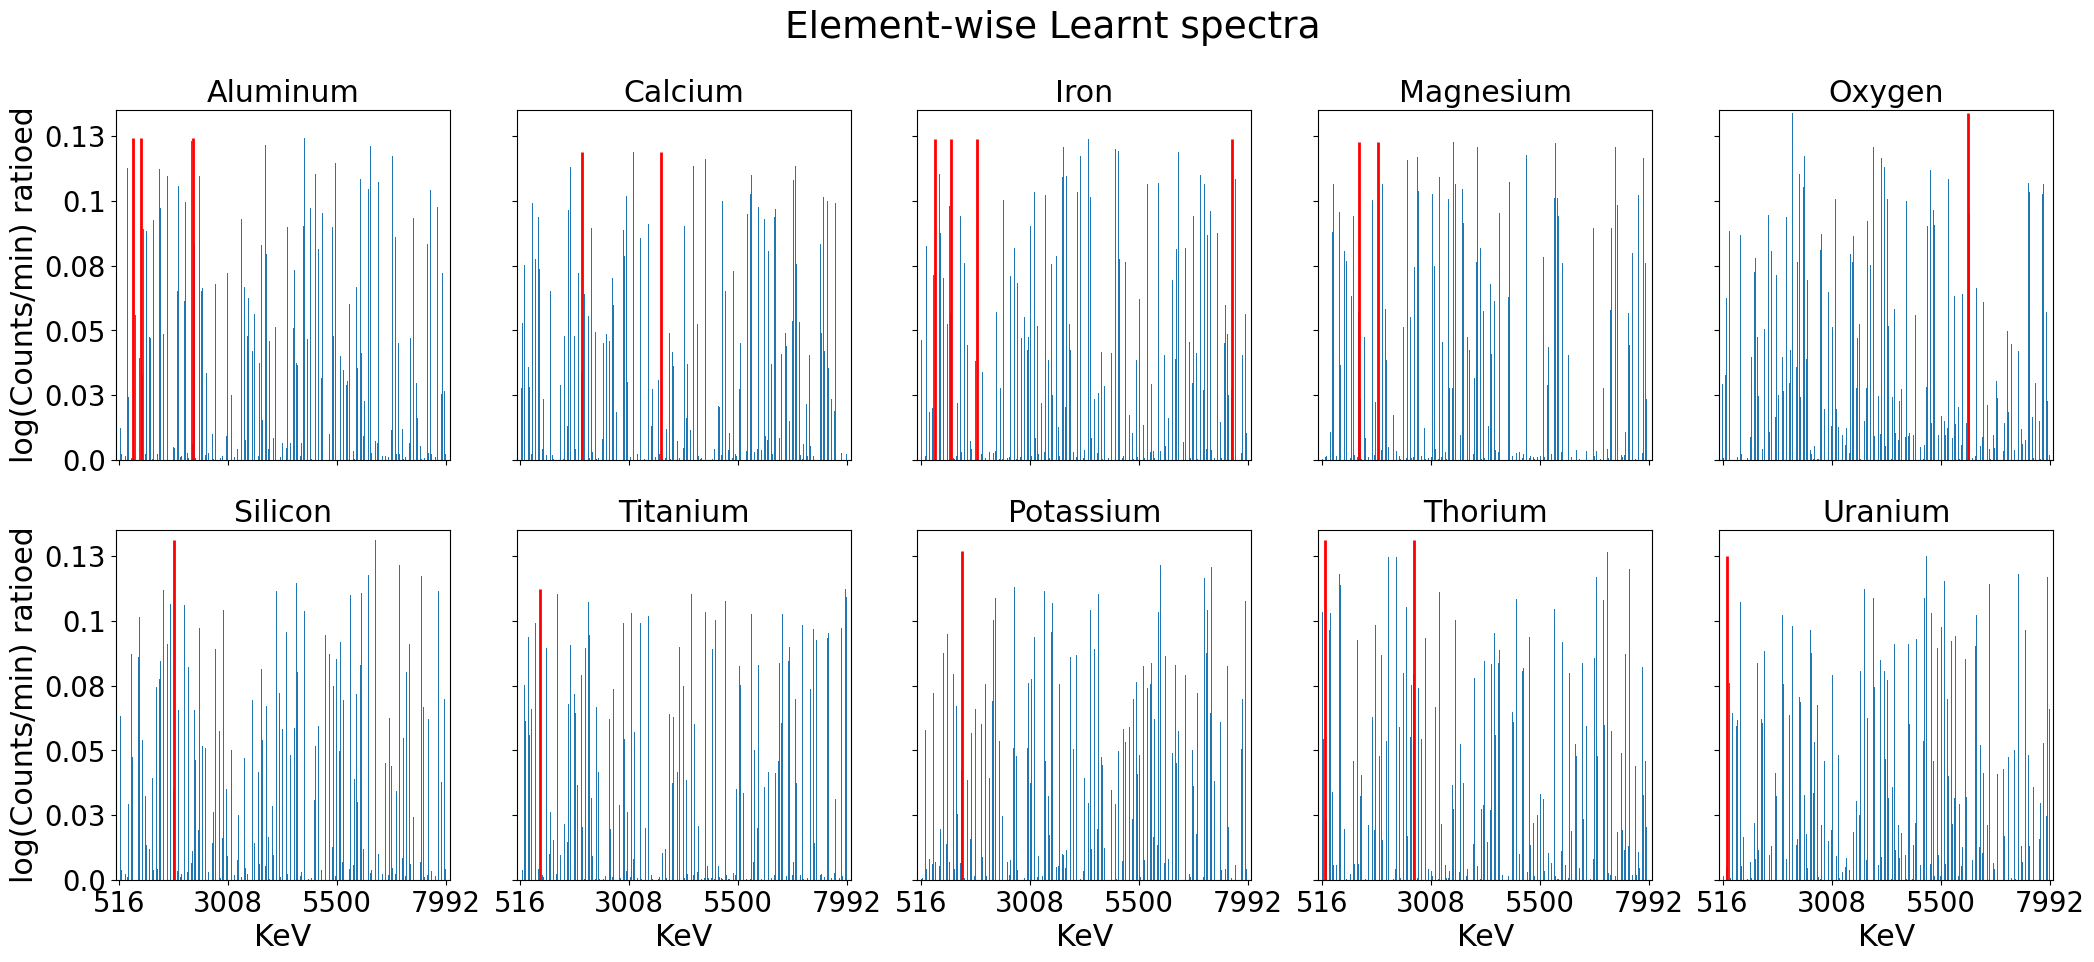

In [85]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i,j]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #plot the spectrum
    axes[i//5,i%5].bar(relaventEnergyBands,
                       currentElementSpectrum,
                       lw=10,
                       width=10)
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

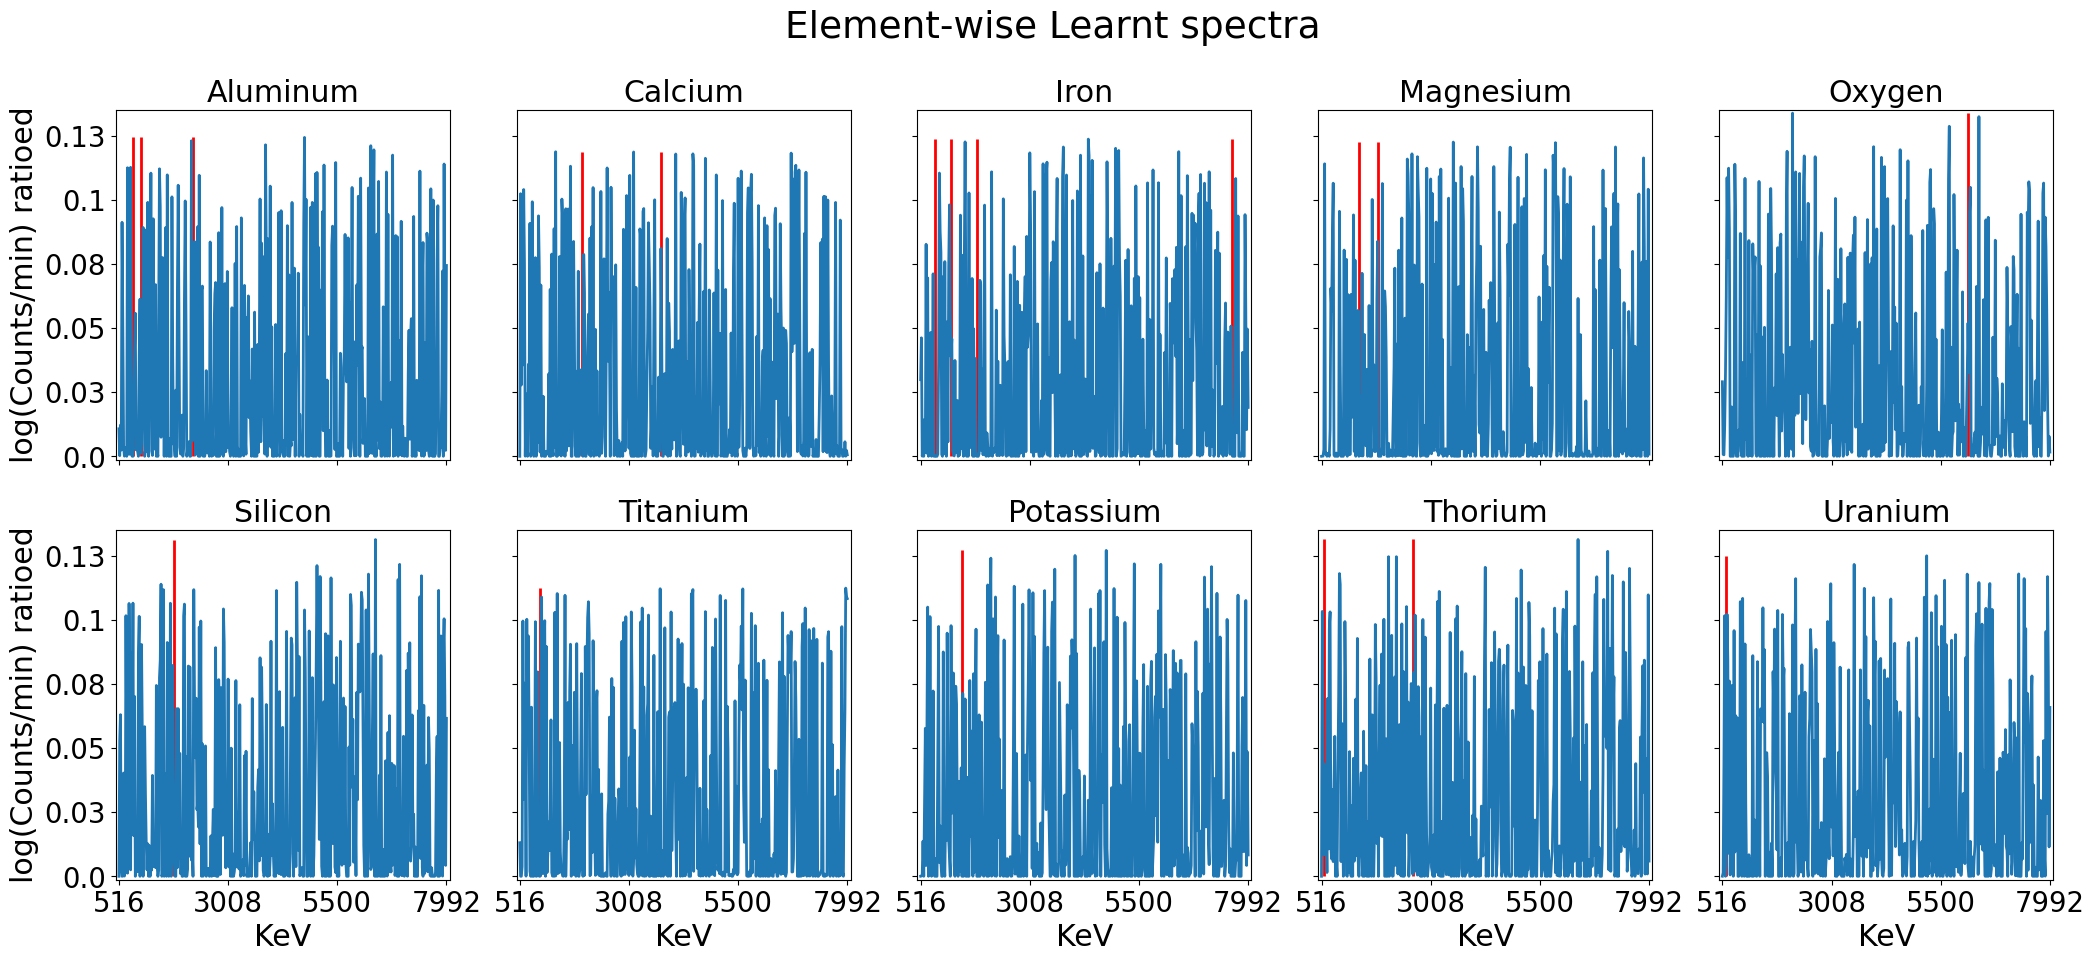

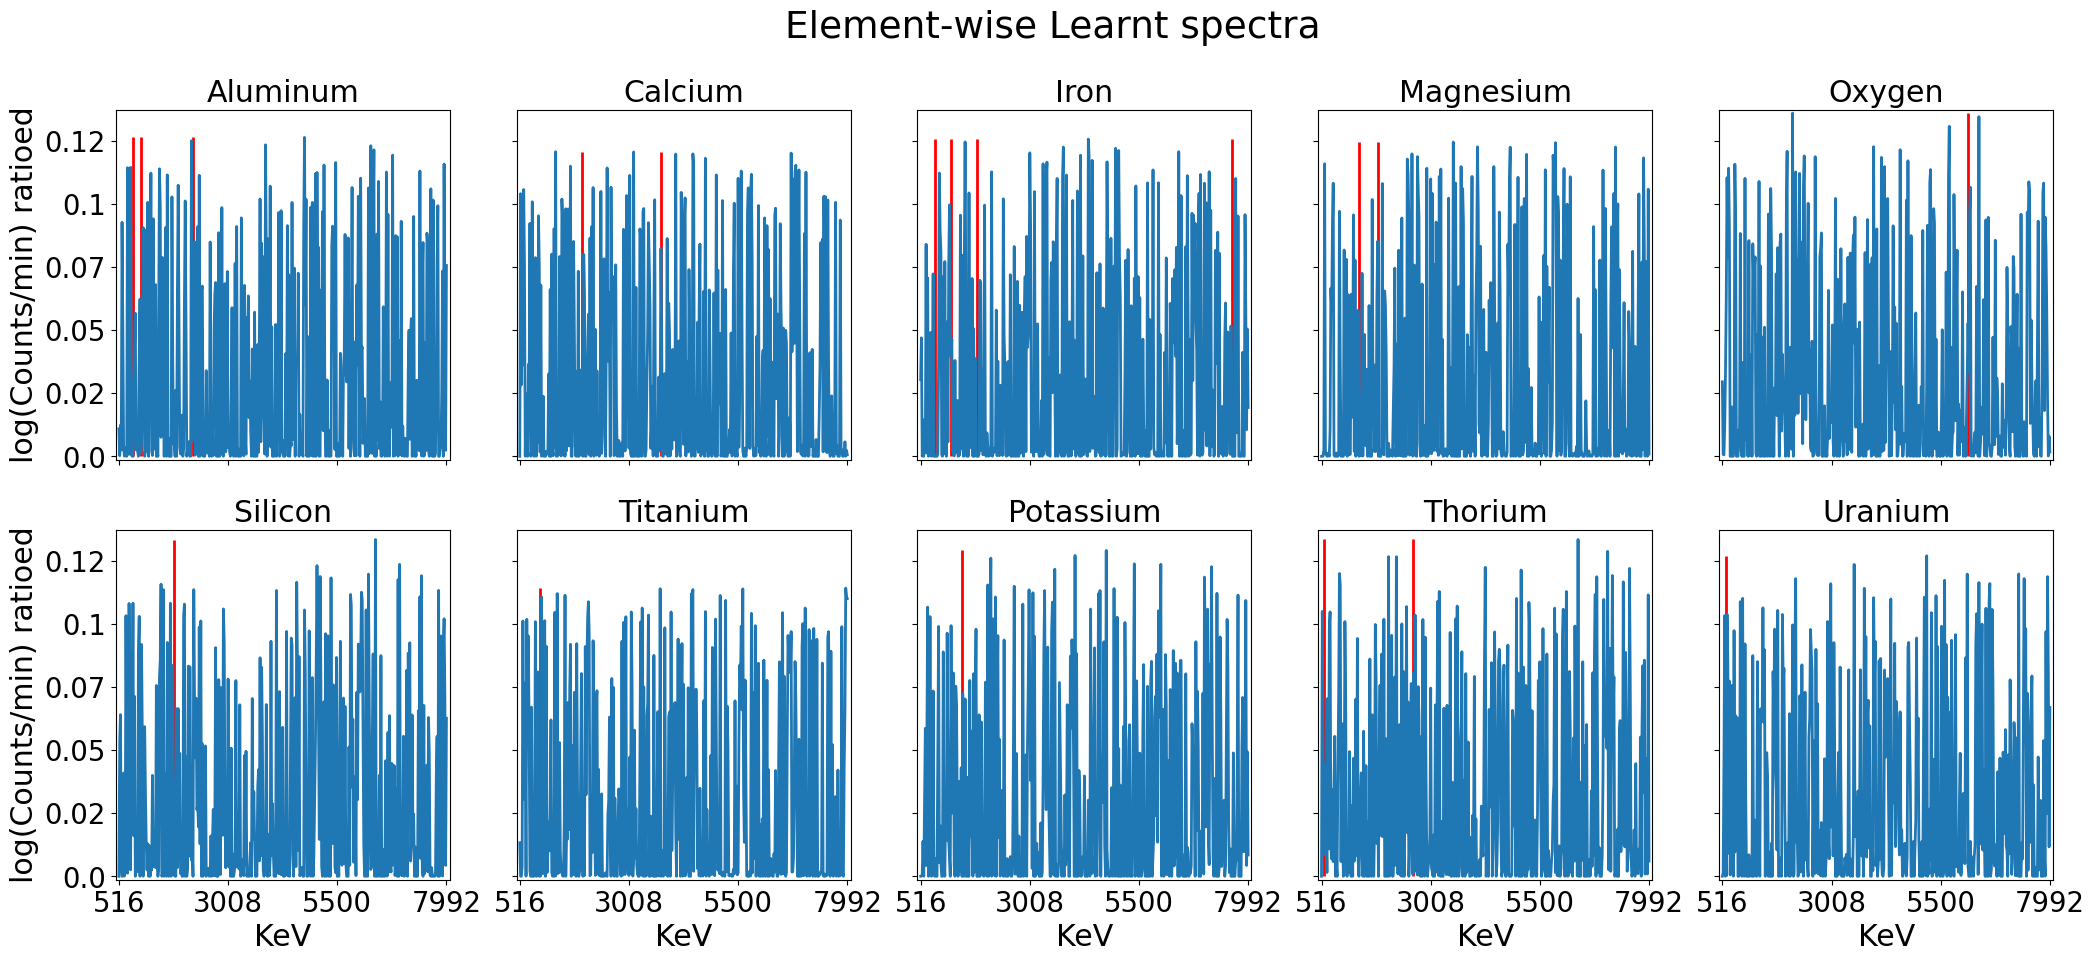

In [86]:
for j in range(2):
    #create a figure 
    figure,axes=plt.subplots(nrows=2,
                             ncols=5,
                             figsize=(5*5,5*2),
                             dpi=100,
                             sharex=True,
                             sharey=True)


    #iterate through all the elements
    for i in range(len(allElementNames)):

        #get the name of the current element
        currentElementName=allElementNames[i]

        #get the mean spectrum for the current element
        currentElementSpectrum=foldWiseLearntElementalSpectra[:,i,0]

        #plot the peak postions
        if len(elementalPeaks[currentElementName])>0:
            axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                                  ymin=0,
                                  ymax=np.amax(currentElementSpectrum),
                                  colors='red',
                                  lw=2)
            #add the position of the peaks as text
            #for currentPeakPositon in elementalPeaks[currentElementName]:
                #axes[i//5,i%5].text(x=currentPeakPositon,
                #                    y=np.amax(currentElementSpectrum)+0.0001,
                #                    s=str(currentPeakPositon),
                #                    fontsize=baseFontSize*1)



        #plot the spectrum
        axes[i//5,i%5].plot(relaventEnergyBands,
                            currentElementSpectrum,
                            lw=2)


        #add the title
        axes[i//5,i%5].set_title(currentElementName,
                                 fontsize=baseFontSize*1.2)

        #set the margin
        axes[i//5,i%5].margins(0.01)

        #add xticks and label
        if i//5==1:
            axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                                np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                np.ptp(relaventEnergyBands)/noOfXticks),
                                      labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                                np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                                np.ptp(relaventEnergyBands)/noOfXticks),
                                                      0).astype('int'),
                                      fontsize=baseFontSize*1.1)
            axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

        #add yticks and label
        if i%5==0:
            axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

        axes[i//5,i%5].set_yticks(np.arange(0,
                                    np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                    np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                          labels=np.round(np.arange(0,
                                                    np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                                    np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                                          2),
                          fontsize=baseFontSize*1.1)
    #add a title
    figure.suptitle(f"Element-wise Learnt spectra",
                    fontsize=baseFontSize*1.5)

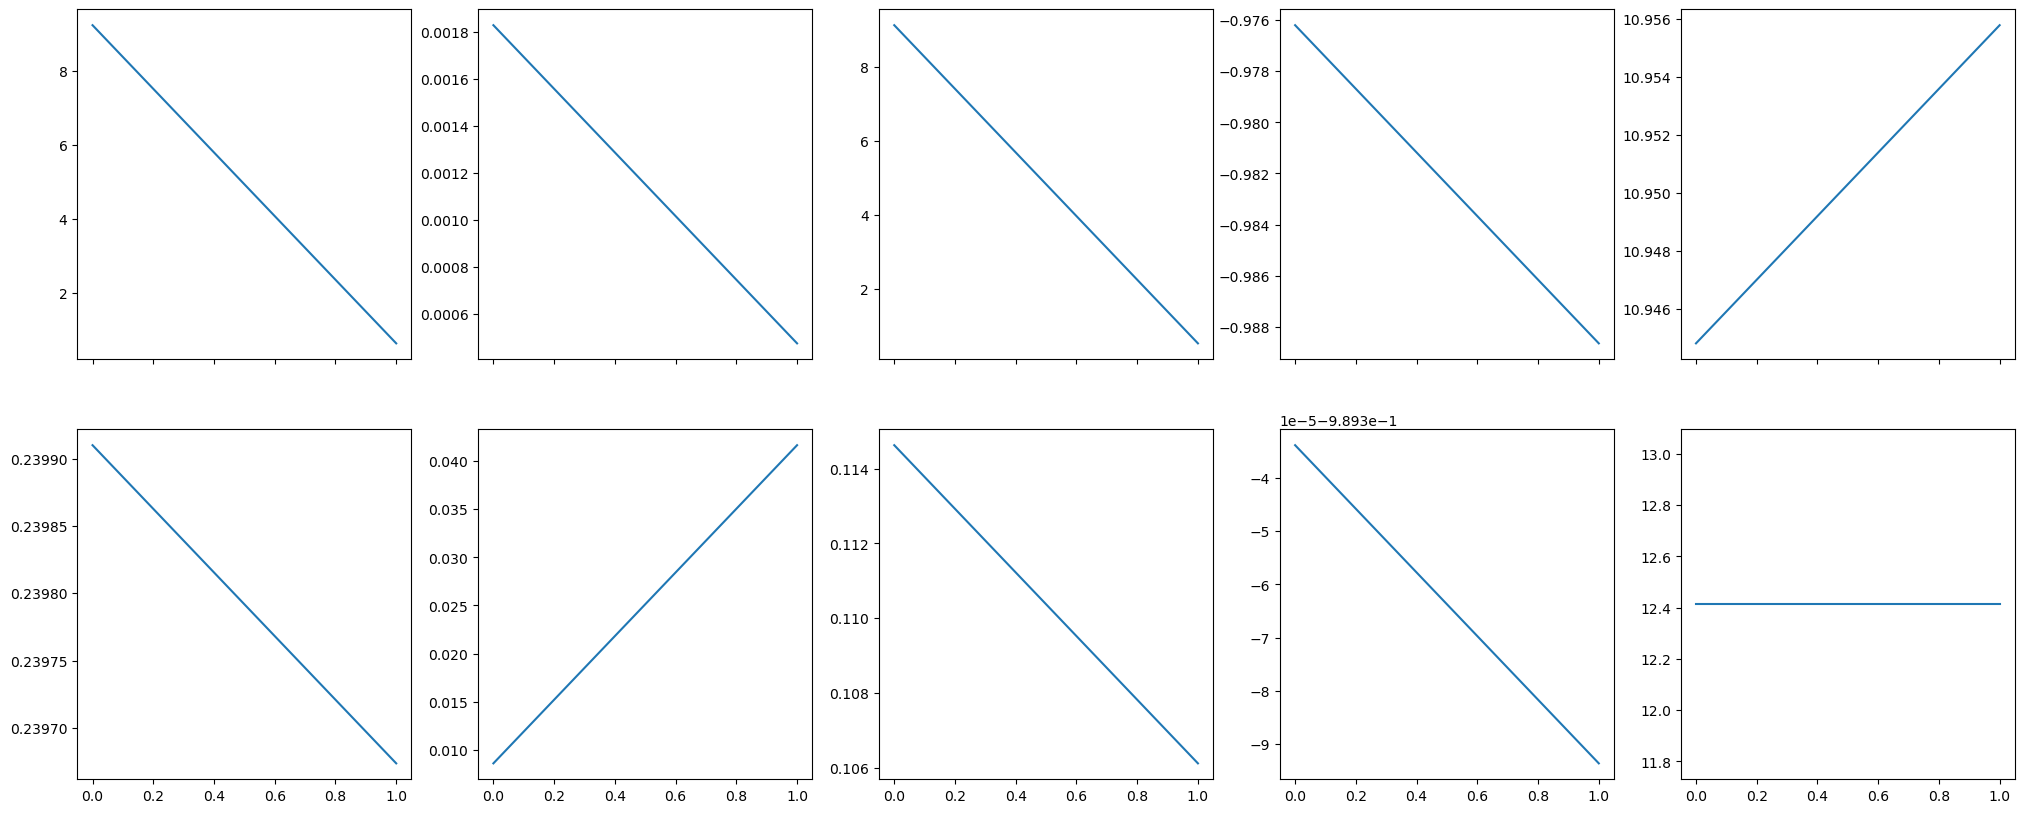

In [87]:
#get the history for the current fold
currentHistory=modelTrainingHistories[j].history
#create a figure
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=False)
#create an array to hold names of losses
lossNames=["Total","Regular Element","Nuclear Elements","Reconstruction","Regularization"]
#iterate through the history
for key,i in zip(currentHistory,range(len(currentHistory))):
    #check if the loss is for training or validation
    if i//5==0:
        #get the name for the current loss
        title="Training_"+lossNames[i%5]
    else:
        #get the name for the current loss
        title="Testing_"+lossNames[i%5]
    #plot the loss
    axes[i//5,i%5].plot(np.arange(len(currentHistory[key])),
                        currentHistory[key])
    